## Import required libraries

In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import numpy as np

from keras.models import Sequential
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import normalize, to_categorical, image_dataset_from_directory
from keras.layers import Dropout
from keras.optimizers import SGD, RMSprop

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
train = '/content/drive/MyDrive/mahjong image rec/data/train'
test = '/content/drive/MyDrive/mahjong image rec/data/test'
val = '/content/drive/MyDrive/mahjong image rec/data/val'

train_X = image_dataset_from_directory(train, shuffle=False, labels=None, batch_size=None,
    image_size=(320, 240))

test_X = image_dataset_from_directory(test, shuffle=False, labels=None, batch_size=None,
    image_size=(320, 240))

val_X = image_dataset_from_directory(val, shuffle=False, labels=None, batch_size=None,
    image_size=(320, 240))


Found 508 files belonging to 1 classes.
Found 60 files belonging to 1 classes.
Found 60 files belonging to 1 classes.


## Display one of the pictures to test

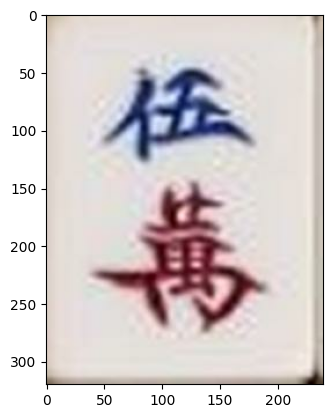

In [4]:
# prompt: display the first element of train_X

import matplotlib.pyplot as plt

first_element = next(iter(val_X))
plt.imshow(first_element.numpy().astype("uint8"))
plt.show()


In [5]:
# prompt: convert all of X_train into a numpy ndarray type

import numpy as np

# Convert the X_train dataset to a NumPy array
train_X = np.array(list(train_X))
test_X = np.array(list(test_X))
val_X = np.array(list(val_X))


## Import CSV file to make y-data for test, train, validate

In [6]:
labels = pd.read_csv("/content/drive/MyDrive/mahjong image rec/data/labels.csv")
# first split the labels according to each of the classes
labels_train = labels.head(508)
labels_test = labels.iloc[508:568]
labels_val = labels.iloc[568:]
# then we sort here
labels_train = labels_train.sort_values(by=['image-name'])
labels_train.reset_index(inplace=True)
labels_test = labels_test.sort_values(by=['image-name'])
labels_test.reset_index(inplace=True)
labels_val = labels_val.sort_values(by=['image-name'])
labels_val.reset_index(inplace=True)
index = pd.read_csv("/content/drive/MyDrive/mahjong image rec/data/index.csv")

## Scale so we can have 0 to 1 float values

In [7]:
train_X = (train_X.astype('float32')) / 255.
test_X = (test_X.astype('float32')) / 255.
val_X = (val_X.astype('float32')) / 255.

In [8]:
# 0-index the classes
vals = []
for i in range (508):
  vals.append([labels_train.label[i] - 1])
train_y = np.array(vals)

vals = []
for i in range (60):
  vals.append([labels_test.label[i] - 1])
test_y = np.array(vals)

vals = []
for i in range (60):
  vals.append([labels_val.label[i] - 1])
val_y = np.array(vals)

# not sure if we need to convert here
train_y = train_y.astype('uint8')
test_y = test_y.astype('uint8')
val_y = val_y.astype('uint8')

## Show before and after converting classes into categorical

In [9]:
print(train_y[0])
print(train_y[69])
print(train_y[420])

[37]
[12]
[17]


In [10]:
train_y_cat = to_categorical(train_y)
test_y_cat = to_categorical(test_y)
val_y_cat = to_categorical(val_y)

In [11]:
print(train_y_cat[0])
print(train_y_cat[69])
print(train_y_cat[420])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [46]:
#Define Model with BatchNormalization and Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(320, 240, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
#model.add(Dropout(0.4))

model.add(Dense(42, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 320, 240, 32)      896       
                                                                 
 batch_normalization_31 (Ba  (None, 320, 240, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2d_27 (Conv2D)          (None, 320, 240, 32)      9248      
                                                                 
 batch_normalization_32 (Ba  (None, 320, 240, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 160, 120, 32)      0         
 ng2D)                                                           
                                                      

In [47]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval.

#Give unique name to save all models as accuracy improves
#filepath="/content/drive/MyDrive/Colab Notebooks/saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.

#Overwrite the model each time accuracy improves. Saves a lot of space.
#filepath="/content/drive/MyDrive/Colab Notebooks/saved_models/best_model.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss.
#checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, accuracy, loss, val_accuracy, val_loss. So we can plot later.
#log_csv = CSVLogger('/content/drive/MyDrive/Colab Notebooks/saved_logs/my_logs.csv', separator=',', append=False)

callbacks_list = [early_stop]

In [48]:
#########################################################
#Fit model....

history = model.fit(train_X, train_y_cat,
                    epochs=25, batch_size=16,
                    validation_data=(val_X, val_y_cat),
                    verbose=1, callbacks=callbacks_list)



Epoch 1/25
32/32 [==============================] - 7s 150ms/step - loss: 2.8561 - accuracy: 0.3091 - val_loss: 1670.2382 - val_accuracy: 0.0167
Epoch 2/25
32/32 [==============================] - 4s 138ms/step - loss: 1.3659 - accuracy: 0.6063 - val_loss: 212.3445 - val_accuracy: 0.0167
Epoch 3/25
32/32 [==============================] - 4s 136ms/step - loss: 0.7304 - accuracy: 0.7992 - val_loss: 12.3615 - val_accuracy: 0.1333
Epoch 4/25
32/32 [==============================] - 4s 138ms/step - loss: 0.4230 - accuracy: 0.8976 - val_loss: 0.7141 - val_accuracy: 0.7833
Epoch 5/25
32/32 [==============================] - 4s 140ms/step - loss: 0.2917 - accuracy: 0.9291 - val_loss: 0.4150 - val_accuracy: 0.8833
Epoch 6/25
32/32 [==============================] - 4s 138ms/step - loss: 0.1311 - accuracy: 0.9921 - val_loss: 0.2085 - val_accuracy: 0.9333
Epoch 7/25
32/32 [==============================] - 4s 136ms/step - loss: 0.0738 - accuracy: 0.9921 - val_loss: 0.2338 - val_accuracy: 0.9333


In [49]:
_, acc = model.evaluate(val_X, val_y_cat)
print("Accuracy = ", (acc * 100.0), "%")

2/2 [==============================] - 0s 91ms/step - loss: 0.1784 - accuracy: 0.9333
Accuracy =  93.33333373069763 %


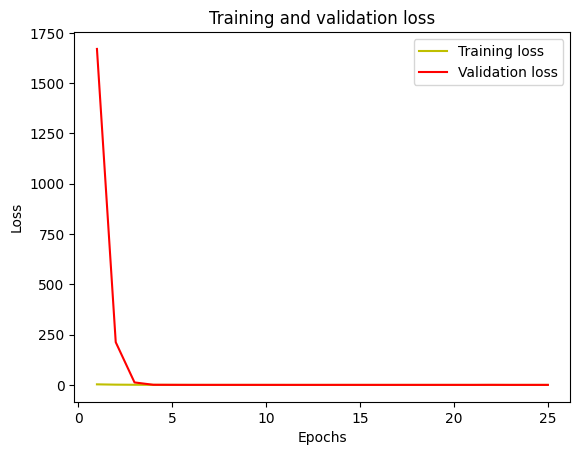

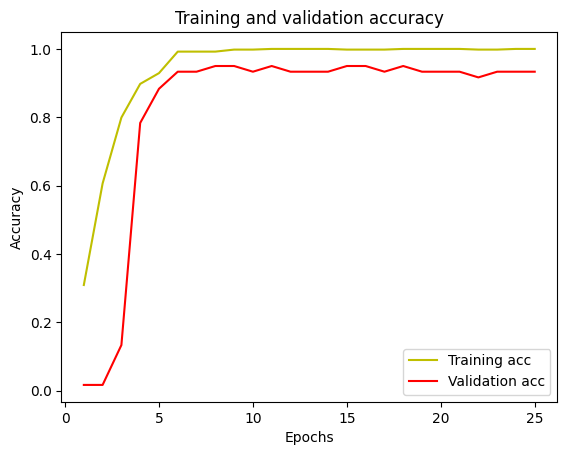

In [50]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation.
#Also, training loss is measured during each epoch while validation is done after the epoch.


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [51]:
import random
x = 0
for test_img_number in range (60):
  test_img = test_X[test_img_number]
  #print(test_img_number)
  test_img_input=np.expand_dims(test_img, 0)
  ground_truth= np.argmax(test_y_cat[test_img_number], axis=None)
  prediction = model.predict(test_img_input)
  #print(prediction)

  predicted_class = np.argmax(prediction, axis=None)

  #plt.figure(figsize=(2, 2))
  #plt.imshow(test_img)

  original_label=ground_truth
  prediction_label=predicted_class
  x += (original_label == prediction_label)

print(x)



#print("Original class is:", original_label)
#print("Predicted class is:", prediction_label)


1/1 [==============================] - 0s 37ms/step
45


1/1 [==============================] - 0s 33ms/step
Original class is: 29
Predicted class is: 29


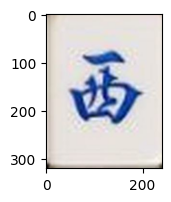

In [65]:
import random
x = 0
test_img_number = random.randint(0, 59)
test_img = test_X[test_img_number]
#print(test_img_number)
test_img_input=np.expand_dims(test_img, 0)
ground_truth= np.argmax(test_y_cat[test_img_number], axis=None)
prediction = model.predict(test_img_input)
#print(prediction)

predicted_class = np.argmax(prediction, axis=None)

plt.figure(figsize=(2, 2))
plt.imshow(test_img)

original_label=ground_truth
prediction_label=predicted_class
#x += (original_label == prediction_label)

#print(x)



print("Original class is:", original_label)
print("Predicted class is:", prediction_label)
